In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.12/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Load the dataset
data = pd.read_csv('/home/ichigo/Desktop/Project2_files/Medical diagnosis using AI/Datasets/heart_disease_data.csv')

In [4]:
# Define non-required columns
non_required_columns = ['fbs', 'restecg', 'slope']

In [5]:
# Drop non-required columns
data = data.drop(columns=non_required_columns)

In [6]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
thalach     0
exang       0
oldpeak     0
ca          0
thal        0
target      0
dtype: int64


In [7]:
# Separate features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Scale the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Check the shape of the data
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (242, 10)
Testing set shape: (61, 10)


In [11]:
# Summary statistics of the dataset
print("Summary Statistics:\n", data.describe())

Summary Statistics:
               age         sex          cp    trestbps        chol     thalach  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026  149.646865   
std      9.082101    0.466011    1.032052   17.538143   51.830751   22.905161   
min     29.000000    0.000000    0.000000   94.000000  126.000000   71.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000  133.500000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000  153.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000  166.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000  202.000000   

            exang     oldpeak          ca        thal      target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.326733    1.039604    0.729373    2.313531    0.544554  
std      0.469794    1.161075    1.022606    

/tmp/ipykernel_361836/2332120623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='Set2')


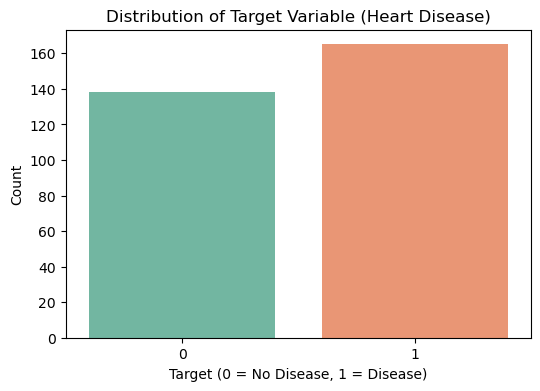

In [12]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data, palette='Set2')
plt.title('Distribution of Target Variable (Heart Disease)')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

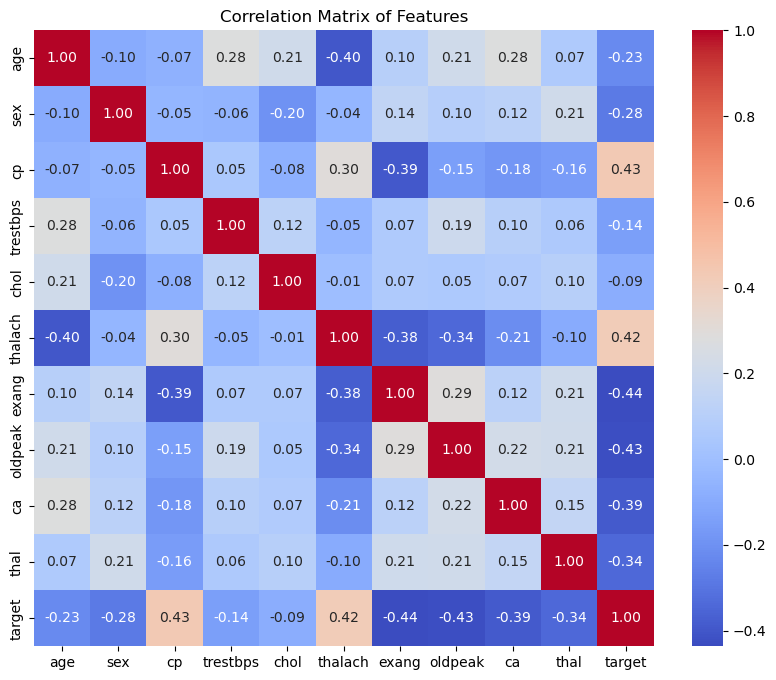

In [13]:
# Correlation matrix to understand relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

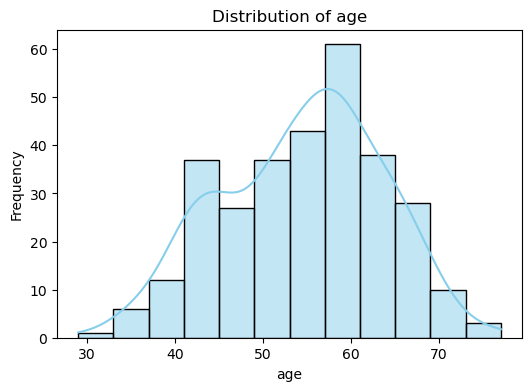

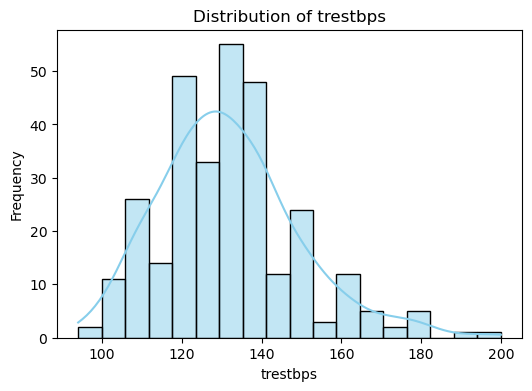

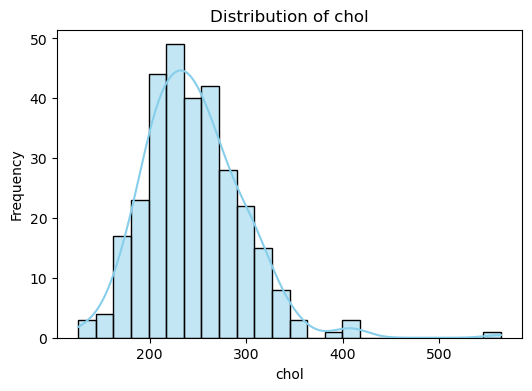

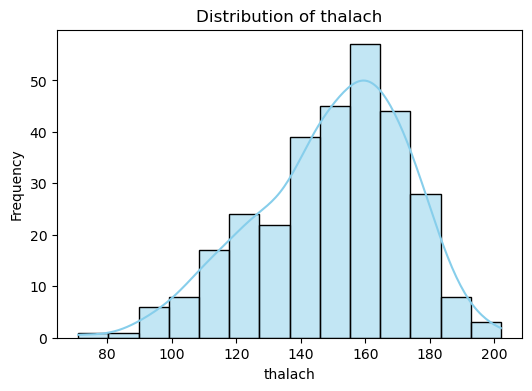

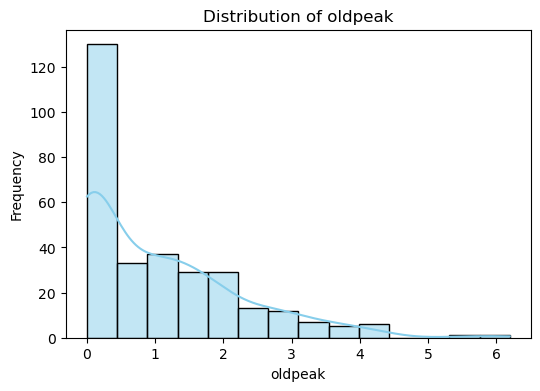

In [14]:
# Visualize the distribution of numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

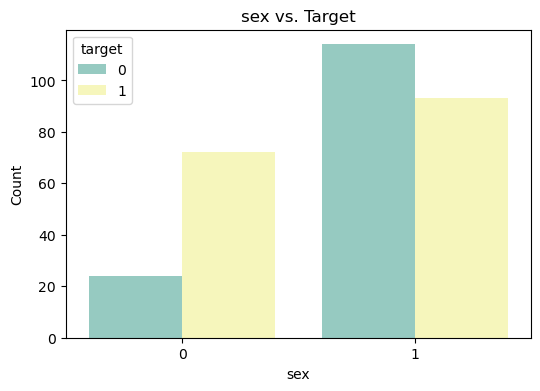

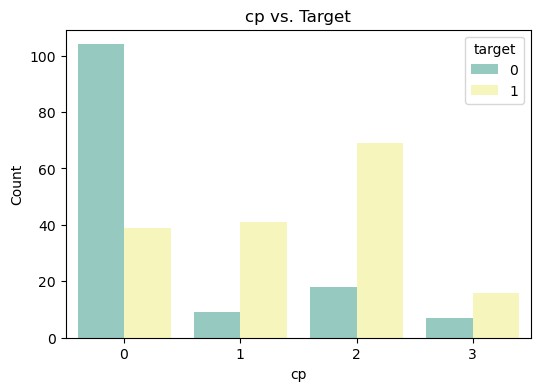

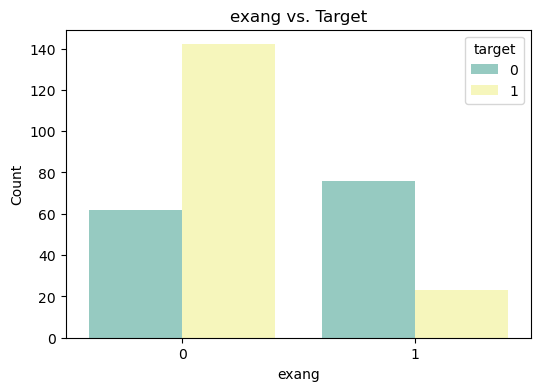

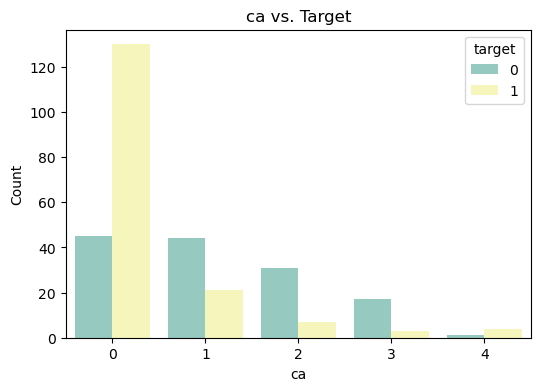

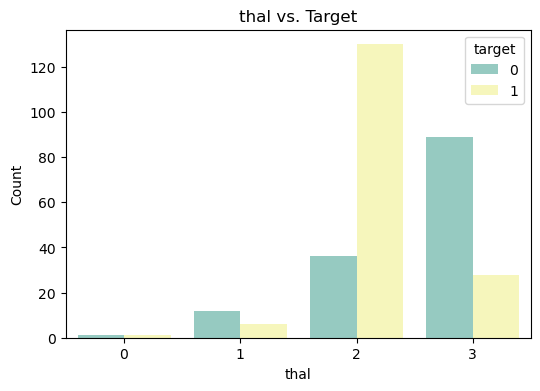

In [15]:
# Visualize categorical features vs. target
categorical_features = ['sex', 'cp', 'exang', 'ca', 'thal']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='target', data=data, palette='Set3')
    plt.title(f'{feature} vs. Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [16]:
# Train the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy Score: 0.8688524590163934

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Confusion Matrix:
 [[25  4]
 [ 4 28]]


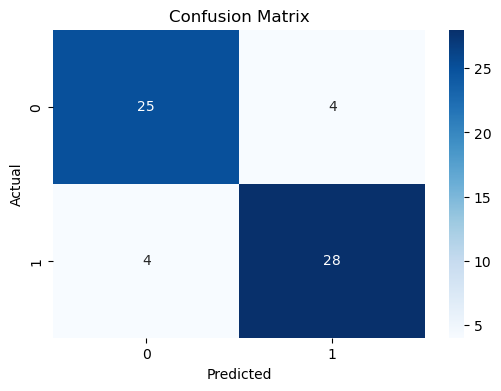

In [17]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [18]:
# Feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance (Coefficients):\n", feature_importance)




Feature Importance (Coefficients):
     Feature  Coefficient
2        cp     0.781866
5   thalach     0.437743
0       age    -0.120916
4      chol    -0.189590
3  trestbps    -0.235279
6     exang    -0.529498
9      thal    -0.544422
8        ca    -0.697367
1       sex    -0.746107
7   oldpeak    -0.875159


/tmp/ipykernel_361836/1174292791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')


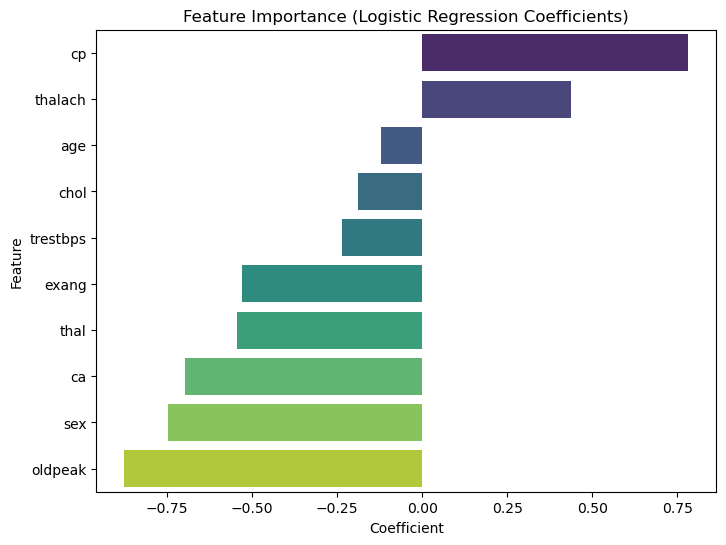

In [19]:
# Visualize feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

In [20]:
#completion

In [21]:
import pickle

# Assume 'model' is your trained ML model
with open("Heart_diseases.pkl", "wb") as file:
    pickle.dump(logreg, file)


In [23]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'ca', 'thal', 'target'],
      dtype='object')